In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Degradation Rates:

$$ { X \xrightarrow{k_0} 0 } $$
$$ { Y \xrightarrow{k_1} 0 } $$
$$ { Z \xrightarrow{k_2} 0 } $$



In [2]:
def Gillespie(N, V, y0, tlen):
    t = 0.0 
    ts = [0.0]  
    y = np.copy(y0) 
    res = [list(y)]
    Degradation = np.linspace(0,5,51) #new
    Deg_index = 1                     #new
    while True: 
        prop = V(y) 
        a0 = sum(prop) 
        if a0 <= 0:
            break
        dt = random.expovariate(a0)   
        if t + dt > tlen: 
            break
        idx = random.choices(population=range(len(prop)),  
                             weights = prop,   
                             k=1) 

        change_to_apply = N[:,idx] 
        change_to_apply.shape = len(change_to_apply) 

        t += dt
        y+= change_to_apply 
        ts.append(t)
        #Added to our function for degradation
        #above loop: Degradation = list(range(1,t))
        if (t) >= Degradation[Deg_index]:
            deg = np.array([-5, -5, -5]) #k0, k1, k2
            y+=deg
            Deg_index+=1
            for i,y_ in enumerate(y):
                if y_ <= 0:
                    y[i] = 0
                
        res.append(list(y))

    return(ts, np.array(res))

Ex #2 from before
$$ { \large X + Y \xrightarrow{c} Y + Y \qquad\qquad
            Y + Z \xrightarrow{c} Z + Z \qquad\qquad
            Z + X \xrightarrow{c} X + X } $$
            

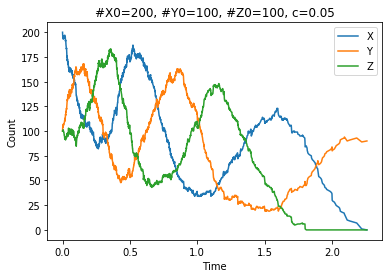

In [6]:
osc_N = np.array([[-1,0,1],
              [1,-1,0],
              [0,1,-1]])

def osc_V_yc(y,c):
    return np.array([c*y[0]*y[1], c*y[1]*y[2], c*y[2]*y[0]])

y0 = np.array([200, 100, 100])
c = 0.05
osc_V = lambda y: osc_V_yc(y,c)
tlen = 5
(ts, res) = Gillespie(osc_N, osc_V, y0, tlen)
xcounts = res[:,0]
ycounts = res[:,1]
zcounts = res[:,2]

plt.figure()
plt.plot(ts, xcounts, label='X')
plt.plot(ts, ycounts, label='Y')
plt.plot(ts, zcounts, label='Z')
plt.xlabel('Time')
plt.ylabel('Count')
titleStr = '#X0='+str(y0[0])+', #Y0='+str(y0[1])+', #Z0='+str(y0[2])+', c='+str(c)
plt.title(titleStr)
plt.legend()
plt.show()

Reactions:
A: Activates
B: Blocks

$$ { X \xrightarrow{B} Y } $$
$$ { Y \xrightarrow{B} X } $$

Expression rate of X, Y: 1

In [7]:
def Gillespie(N, V, y0, tlen, deg):
    t = 0.0 
    ts = [0.0]  
    y = np.copy(y0) 
    res = [list(y)]
    Degradation = np.linspace(0,5,51) 
    Deg_index = 1                     
    while True: 
        prop = V(y) 
        a0 = sum(prop) 
        if a0 < 0:
            print('propensity')
            break
        dt = random.expovariate(a0)   
        if t + dt > tlen: 
            print('time')
            break
        
        change_to_apply = np.array([0., 0.]) #no change to apply this time
        if y[0] == y[1] == 0:
            change_to_apply =  np.array([1., 1.])
        if y[0] == 0:
            change_to_apply =  np.array([0., 100.])
        if y[1] == 0:
            change_to_apply =  np.array([100., 0.])
        t += dt
        y+= change_to_apply 
        ts.append(t)
        if (t) >= Degradation[Deg_index]:
            deg = np.array(deg) 
            y+=deg
            Deg_index+=1
            for i,y_ in enumerate(y):
                if y_ <= 0:
                    y[i] = 0
                
        res.append(list(y))

    return(ts, np.array(res))

time


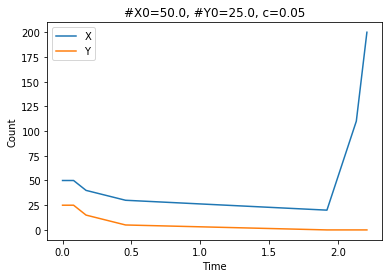

In [8]:
N = np.array([
    [0]
    [0]
])

def V(y, c):
    return np.array([c*y[0]])

Vy = lambda y: V(y,c)
y0 = np.array([50., 25.])
deg = [-10,-10]
c = 0.05
tlen = 2.3

(ts, res) = Gillespie(N, Vy, y0, tlen, deg)
xcounts = res[:,0]
ycounts = res[:,1]

plt.figure()
plt.plot(ts, xcounts, label='X')
plt.plot(ts, ycounts, label='Y')
plt.xlabel('Time')
plt.ylabel('Count')
titleStr = '#X0='+str(y0[0])+', #Y0='+str(y0[1])+', c='+str(c)
plt.title(titleStr)
plt.legend()
plt.show()

Activates:

$$ { X \xrightarrow{A} Y } $$
$$ { Y \xrightarrow{A} X } $$


In [9]:
def Gillespie(N, V, y0, tlen, deg):
    t = 0.0 
    ts = [0.0]  
    y = np.copy(y0) 
    res = [list(y)]
    Degradation = np.linspace(0,5,51) 
    Deg_index = 1                     
    while True: 
        prop = V(y) 
        a0 = sum(prop) 
        if a0 <= 0:
            print('propensity')
            break
        dt = random.expovariate(a0)   
        if t + dt > tlen: 
            print('time')
            break
        
        change_to_apply = np.array([0., 0.]) #no change to apply this time

        if y[0] > 0:
            change_to_apply =  np.array([0., float(2 * y[0])])
        if y[1] > 0:
            change_to_apply =  change_to_apply + np.array([float(1 * y[1]), 0.])
        t += dt
        y+= change_to_apply 
        ts.append(t)
        if (t) >= Degradation[Deg_index]:
            deg = np.array(deg) 
            y+=deg
            Deg_index+=1
            for i,y_ in enumerate(y):
                if y_ <= 0:
                    y[i] = 0
                
        res.append(list(y))

    return(ts, np.array(res))

time


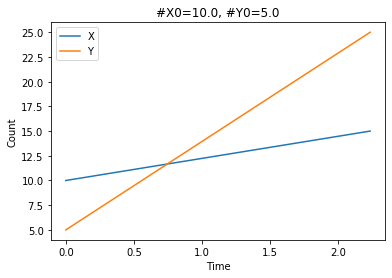

In [10]:
N = np.array([
    [0]
    [0]
])

def V(y, c):
    return np.array([c*y[0]])

Vy = lambda y: V(y,c)
y0 = np.array([10., 5.])
deg = [-0,-0]
c = 0.05
tlen = 2.3

(ts, res) = Gillespie(N, Vy, y0, tlen, deg)
xcounts = res[:,0]
ycounts = res[:,1]

plt.figure()
plt.plot(ts, xcounts, label='X')
plt.plot(ts, ycounts, label='Y')
plt.xlabel('Time')
plt.ylabel('Count')
titleStr = '#X0='+str(y0[0])+', #Y0='+str(y0[1])
plt.title(titleStr)
plt.legend()
plt.show()